In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('goog.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
1,2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2,2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
3,2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
4,2016-12-23,790.900024,792.739990,787.280029,789.909973,623400


In [5]:
df.sort_values('Date', inplace=True)

In [6]:
columns = df.columns[1:]
columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
data = df[columns].values

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
def generate_sequential_data(data, seq_length):
    l = len(data)
    x = []
    y = []
    for i in range(l-seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length][3])
    return np.array(x), np.array(y)

In [10]:
seq_length = 10
x, y = generate_sequential_data(data, seq_length)

In [ ]:
train_size = 0.8
data_len = len(x)
split_length = int(data_len*train_size)

x_train = x[:split_length]
y_train = y[:split_length]

x_test = x[split_length:]
y_test = y[split_length:]

In [12]:
features = len(columns)
input_shape = (seq_length, features)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

model = Sequential([
    Input(shape=input_shape),
    LSTM(units=64),
    Dense(units=256, activation='relu'),
    Dense(units=1, activation='relu')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

2025-05-04 13:16:52.201933: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,817 (136.00 KB)

 Trainable params: 34,817 (136.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2692 - mean_squared_error: 0.2692 - val_loss: 0.4856 - val_mean_squared_error: 0.4856
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2001 - mean_squared_error: 0.2001 - val_loss: 0.3433 - val_mean_squared_error: 0.3433
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1430 - mean_squared_error: 0.1430 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.1282 - val_mean_squared_error: 0.1282
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0038 - val_mean_squared_e

In [15]:
loss, metric = model.evaluate(x_test, y_test)
print(f"MSE: {metric}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026 - mean_squared_error: 0.0026
MSE: 0.002558271400630474


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


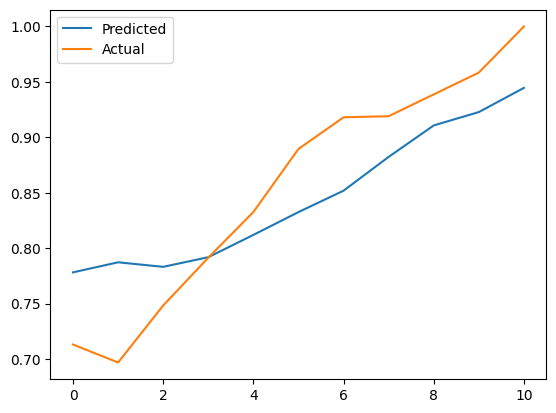

In [16]:
y_pred = model.predict(x_test)

plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [24]:
print(f"Actual: {y_test[0]:.2f}")
print(f"Predicted: {y_pred[0][0]:.2f}")

Actual: 0.71
Predicted: 0.78
